<a href="https://colab.research.google.com/github/vikasstudy/deep-learning-keras-tf-tutorial/blob/master/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
# Load the dataset
data = pd.read_csv('Customer_Churn_Modelling.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
# see first 5 rows
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# Check Descriptive information of dataset features
#print(data.describe(include='all').T)

for col in data.columns :
  print({col} ,":" ,len(data[col].unique()))


 

  #There are around 25% of observations in above dataset have zero Balance.

{'RowNumber'} : 10000
{'CustomerId'} : 10000
{'Surname'} : 2932
{'CreditScore'} : 460
{'Geography'} : 3
{'Gender'} : 2
{'Age'} : 70
{'Tenure'} : 11
{'Balance'} : 6382
{'NumOfProducts'} : 4
{'HasCrCard'} : 2
{'IsActiveMember'} : 2
{'EstimatedSalary'} : 9999
{'Exited'} : 2


In [23]:
 # Check for null values  
print({col} ,"is null :" ,data.isnull().sum())

{'Exited'} is null : RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [24]:
# Check for number of unique values in features
data.nunique()
#Geography. Gender,NumOfProducts, HasCrCard, IsActiveMember and Existed features are categorical.

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

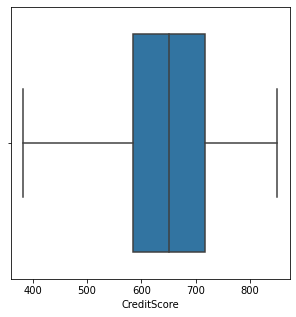

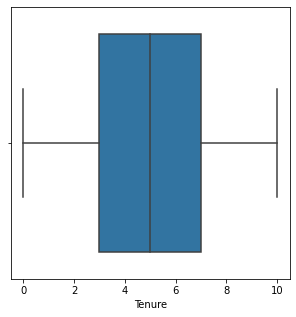

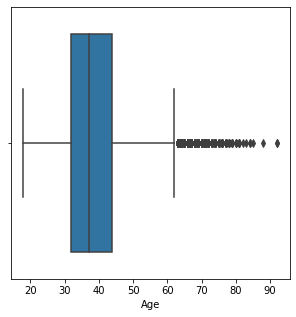

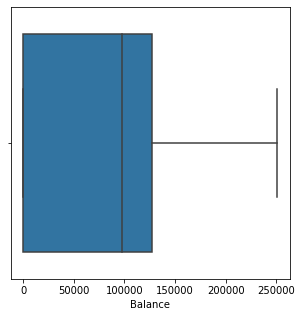

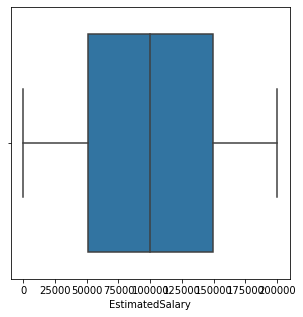

In [38]:
# Draw box plot to check for outliers in continous feature
for feature in ['CreditScore', 'Tenure', 'Age', 'Balance', 'EstimatedSalary']:
  plt.figure(figsize=(5, 5))
  sns.boxplot(x = feature, data = data)

#There are outliers in CreditScore & Age feature.

In [37]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# calculate interquartile range
q25 = percentile(data['CreditScore'], 25)
q75=percentile(data['CreditScore'], 75)
iqr = q75 - q25
print('IQR:' ,iqr)
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('lower:',lower ,'upper :',upper)

# identify outliers

#  outliers is  replaced by boundary values 
data.CreditScore.clip(lower = lower, upper = upper, inplace=True)

IQR: 134.0
lower: 383.0 upper : 919.0


In [43]:
# Organize Age in 4 groups based on range
data['AgeGroup'] = pd.cut(data.Age,bins=[17,40, 60, 93],labels=['Young','Elderly','Pentioner'])

In [47]:
data['AgeGroup'].unique()

['Elderly', 'Young', 'Pentioner']
Categories (3, object): ['Young' < 'Elderly' < 'Pentioner']

AgeGroup
Young        6419
Elderly      3117
Pentioner     464
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


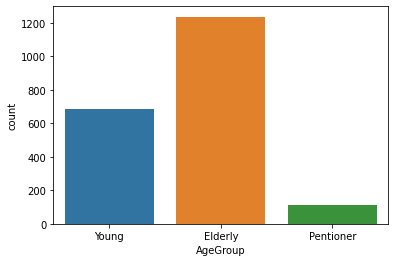

In [58]:
print(data.groupby(['AgeGroup']).size() )

#bar chart 

# Bar plot of Different Age Group Vs Exited feature
print(sns.countplot(x = 'AgeGroup', data = data[data.Exited == 1]) )
# there are few other plot techniques to show both data in single plot 

In [59]:
# Classify Credit Score based on FICO range
data['CreditScoreGroup'] = pd.cut(data.CreditScore,bins=[300, 579, 669, 739, 799, 900],labels=[0, 1, 2, 3, 4])
data['CreditScoreGroup'] = data.CreditScoreGroup.astype(int)

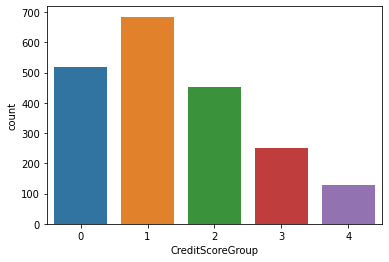

In [60]:
# Bar plot of Different Credit Score Group Vs Exited feature
sns.countplot(x = 'CreditScoreGroup', data = data[data.Exited == 1])

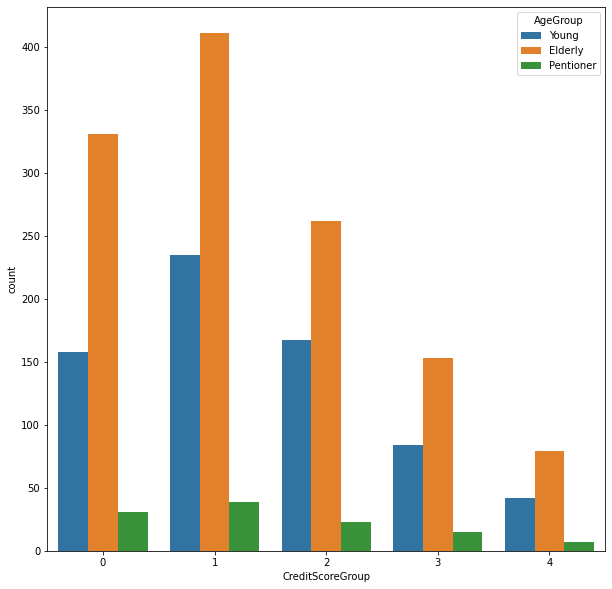

In [61]:
# Bar plot of Different Credit Score Group Vs Exited feature
plt.figure(figsize=(10, 10))
sns.countplot( x = 'CreditScoreGroup', data = data[data.Exited == 1], hue = 'AgeGroup')

BalanceGroup
0    3617
1    1584
2    4799
dtype: int64


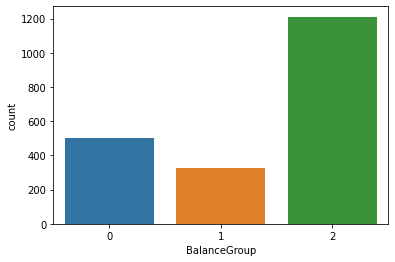

In [113]:
# Organize Balance in 2 groups based on zero and non-zero
data['BalanceGroup'] = pd.cut(data['Balance'],bins=[-1,10.00,100000.00,100000000.00],labels=[0,1,2])
data['BalanceGroup'] = data.BalanceGroup.astype(int)
print(data.groupby(['BalanceGroup']).size() )
sns.countplot(x = 'BalanceGroup', data = data[data.Exited == 1])